In [1]:
!pip install keras 
!pip install tensorflow

In [30]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [31]:
data=pd.read_csv('gas_turbines.csv')

In [32]:
data.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [33]:
data.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [37]:
from keras.models import Sequential
from keras.layers import Dense
import numpy


In [46]:



X = data.loc[:,['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'CDP', 'CO','NOX']]
y= data.loc[:,['TEY']]

In [47]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [48]:
scaled = StandardScaler()
X= scaled.fit_transform(X)
Y = scaled.fit_transform(y)

In [49]:
X

array([[-1.4397781 , -0.82664395,  1.28143632, ..., -1.35733078,
         0.53201195,  1.3878449 ],
       [-1.44960109, -0.74864748,  1.30456402, ..., -1.36367619,
         0.56873344,  1.39300237],
       [-1.43472138, -0.68625031,  1.21908576, ..., -1.36095673,
         0.5529378 ,  1.36358566],
       ...,
       [-1.38626659, -1.07623263,  1.47697056, ..., -1.46792219,
         2.69592467,  2.17006209],
       [-1.42042259, -0.99823616,  1.44159024, ..., -1.42259784,
         1.9246834 ,  2.391165  ],
       [-1.43073409, -0.93583899,  1.33465179, ..., -1.37727349,
         1.35415028,  2.32153907]])

In [51]:
Y

array([[-1.23117246],
       [-1.22990897],
       [-1.23054071],
       ...,
       [-1.5160891 ],
       [-1.48134317],
       [-1.42827666]])

In [52]:
def baseline_model():
    model = Sequential()
    model.add(Dense(10, input_dim=10, activation='tanh'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model


In [53]:
import keras
from sklearn.model_selection import KFold
from keras.wrappers.scikit_learn import KerasRegressor
from keras.models import Sequential
from keras.layers import InputLayer,Dense
estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=50, batch_size=100, verbose=False)
kfold = KFold(n_splits=10)
results = cross_val_score(estimator, X, y, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

C:\Users\ZomAdmin\AppData\Local\Temp/ipykernel_10660/1991303876.py:6: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=50, batch_size=100, verbose=False)


Results: -18169.02 (1526.31) MSE


In [54]:
estimator.fit(X, y)
prediction = estimator.predict(X)
prediction

array([-0.6040909 , -0.62791795, -0.60750926, ..., -2.0821574 ,
       -1.8292334 , -1.4952055 ], dtype=float32)

In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [56]:
estimator.fit(X_train, y_train)
prediction = estimator.predict(X_test)

In [57]:
prediction

array([1.6383299 , 1.8546832 , 0.5798976 , ..., 0.7822022 , 1.0343212 ,
       0.00747053], dtype=float32)

In [58]:
X = data.drop(columns = ['TEY'], axis = 1) 
y = data.iloc[:,7]
from sklearn.preprocessing import scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)
X_test_scaled

array([[ 0.82623246, -0.43954308, -0.25924569, ...,  0.10039242,
        -0.3796304 , -0.69217007],
       [ 0.35282087,  0.23279782,  0.80230139, ..., -1.18541222,
         0.39149515, -1.09475442],
       [ 0.32839008, -0.07135639,  0.25312287, ...,  0.01665304,
        -0.00296896, -0.31891741],
       ...,
       [-0.74071701,  0.37687087,  0.43427425, ...,  1.77157829,
        -1.00127821, -0.4818816 ],
       [-0.49965786, -0.39151873,  0.64680105, ..., -0.26517949,
        -0.48137538,  0.12808615],
       [ 0.13151427,  0.32884652,  0.98830762, ..., -1.40331469,
         0.13152215, -0.64456466]])

In [59]:
import tensorflow as tf
input_size = len(X.columns)
output_size = 1
hidden_layer_size = 50

model = tf.keras.Sequential([
                                
                               tf.keras.layers.Dense(hidden_layer_size, input_dim = input_size, activation = 'relu'),
                               tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),
                               tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),
                               tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),     
                               tf.keras.layers.Dense(output_size)
                             ])

In [60]:
optimizer = tf.keras.optimizers.SGD(learning_rate = 0.03)
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['MeanSquaredError'])
num_epochs = 100
early_stopping = tf.keras.callbacks.EarlyStopping(patience = 2)
model.fit(X_train_scaled, y_train, callbacks = early_stopping, validation_split = 0.1, epochs = num_epochs, verbose = 2)

Epoch 1/100
381/381 - 3s - loss: 3085.1221 - mean_squared_error: 3085.1221 - val_loss: 201.8470 - val_mean_squared_error: 201.8470 - 3s/epoch - 7ms/step
Epoch 2/100
381/381 - 1s - loss: 99.3433 - mean_squared_error: 99.3433 - val_loss: 83.7113 - val_mean_squared_error: 83.7113 - 643ms/epoch - 2ms/step
Epoch 3/100
381/381 - 1s - loss: 41.5771 - mean_squared_error: 41.5771 - val_loss: 35.0172 - val_mean_squared_error: 35.0172 - 594ms/epoch - 2ms/step
Epoch 4/100
381/381 - 1s - loss: 20.5225 - mean_squared_error: 20.5225 - val_loss: 16.5554 - val_mean_squared_error: 16.5554 - 597ms/epoch - 2ms/step
Epoch 5/100
381/381 - 1s - loss: 10.9845 - mean_squared_error: 10.9845 - val_loss: 8.4045 - val_mean_squared_error: 8.4045 - 666ms/epoch - 2ms/step
Epoch 6/100
381/381 - 1s - loss: 5.9274 - mean_squared_error: 5.9274 - val_loss: 4.8101 - val_mean_squared_error: 4.8101 - 703ms/epoch - 2ms/step
Epoch 7/100
381/381 - 1s - loss: 3.6026 - mean_squared_error: 3.6026 - val_loss: 3.4333 - val_mean_squa

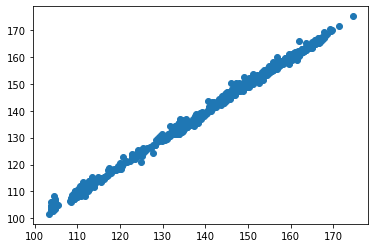

In [63]:
predictions = model.predict_on_batch(X_test_scaled)
plt.scatter(y_test, predictions)

In [64]:
predictions_df = pd.DataFrame()
predictions_df['Actual'] = y_test
predictions_df['Predicted'] = predictions
predictions_df['% Error'] = abs(predictions_df['Actual'] - predictions_df['Predicted'])/predictions_df['Actual']*100
predictions_df.reset_index(drop = True)

,Actual,Predicted,% Error
0,134.46,134.260162,0.148622
1,111.88,110.886597,0.887919
2,133.72,133.589996,0.097221
3,133.79,134.053467,0.196926
4,110.77,109.934296,0.754450
...,...,...,...
1499,132.85,132.423843,0.320780
1500,125.07,122.997971,1.656696
1501,160.95,161.050797,0.062626
1502,133.12,132.617859,0.377209
